In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('../raw_data/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df = df.drop(labels='Unnamed: 32', axis=1)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
list = ['id','diagnosis']
x = df.drop(list,axis = 1 )

In [7]:
drop_list = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_select = x.drop(drop_list,axis = 1 )
x_select

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.30010,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.16220,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.08690,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.12380,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.19740,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.14440,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.24140,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.20980,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.19800,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.13740,0.4000,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,22.39,1479.0,0.11100,0.24390,0.1726,0.05623,1.2560,158.70,0.010300,0.05198,0.01114,0.004239,0.14100,0.4107,0.2060,0.07115
565,28.25,1261.0,0.09780,0.14400,0.1752,0.05533,2.4630,99.04,0.005769,0.03950,0.01898,0.002498,0.11660,0.3215,0.2572,0.06637
566,28.08,858.1,0.08455,0.09251,0.1590,0.05648,1.0750,48.55,0.005903,0.04730,0.01318,0.003892,0.11390,0.3403,0.2218,0.07820
567,29.33,1265.0,0.11780,0.35140,0.2397,0.07016,1.5950,86.22,0.006522,0.07117,0.02324,0.006185,0.16500,0.9387,0.4087,0.12400


<AxesSubplot:>

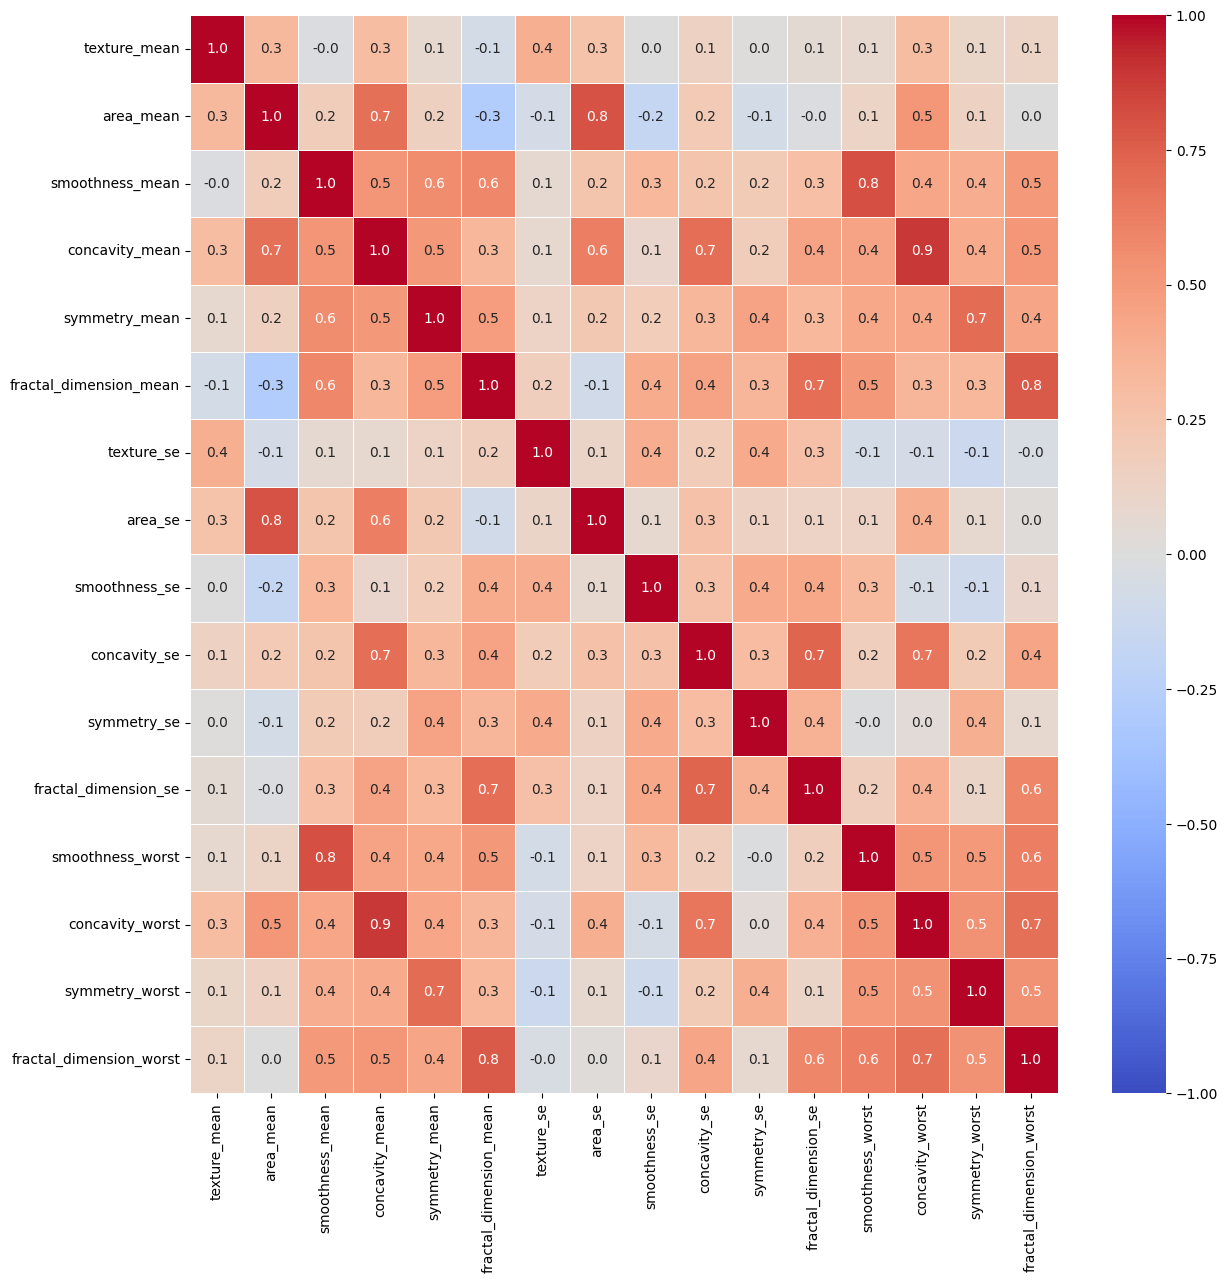

In [8]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_select.corr(), annot=True, linewidths=.5, fmt= '.1f', vmin=-1, vmax=1, cmap='coolwarm',ax=ax)

# Use drop_data.csv